### **nn.Linear와 nn.sigmoid로 Logistic Regression 구현**

In [2]:
# 환경 설정

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [3]:
# 데이터

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [4]:
model = nn.Sequential( # Sequential을 통해 nn.Module 층을 차례로 쌓음
    nn.Linear(2, 1),
    nn.Sigmoid() # 출력은 시그모이드 함수를 거침
)

In [5]:
model(x_train) # 현재는 임의의 W와 b가 있는 상태라 결과가 의미 없음

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [6]:
# optimizer 설정

optimizer = optim.SGD(model.parameters(), lr=1) # 손실 함수 최소화를 위한 가중치, 편향 등 파라미터 업데이트

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [8]:
model(x_train) >= 0.5

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])

In [9]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


### **인공 신경망으로 표현되는 Logistic Regression**

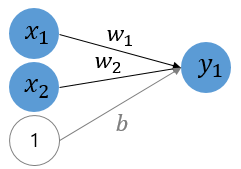

Logistic Regression은 다음과 같은 인공 신경망으로 간주할 수 있음

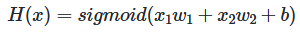

다음과 같은 다중 로지스틱 회귀임

### **모델로 클래스 구현**

In [ ]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

위 모델을 아래와 같이 클래스로 구현해 봄

In [10]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__() # nn.Module의 속성을 가진 채로 초기화
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x): # 데이터를 모델에 넣어 예측 계산
        return self.sigmoid(self.linear(x))

In [11]:
# 환경 설정

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [12]:
# 데이터

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [13]:
# 모델

model = BinaryClassifier()

In [14]:
# optimizer 설정

optimizer = optim.SGD(model.parameters(), lr=1) # 옵티마이저로 SGD(Stochastic Gradient Descent)를 설정하고 학습률을 1로 지정

nb_epochs = 1000 # 1000번의 에포크 동안 모델을 학습

for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)  # 각 에포크에서 모델을 통해 예측값인 hypothesis를 계산

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train) # 예측값과 실제 레이블인 y_train 간의 손실을 binary_cross_entropy 함수로 계산하여 cost 값을 얻음

    # cost로 H(x) 계산
    optimizer.zero_grad() # 옵티마이저의 기울기를 초기화
    cost.backward() # 역전파를 수행하여 모델의 파라미터에 대한 기울기를 계산
    optimizer.step() # optimizer.step()을 호출하여 파라미터를 업데이트

    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))


Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00